# Linear Regression For Boston House Price

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set()

## Load the Dataset

we use the boston boston house price dataset

In [2]:
dataset = pd.read_csv('Boston/boston.csv')
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Attribute Information
Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

معلومات السمة
أدخل الميزات بالترتيب:
1) CRIM: معدل الجريمة للفرد حسب المدينة
2) ZN: نسبة الأراضي السكنية المخصصة للأراضي التي تزيد مساحتها عن 25000 قدم مربع
3) INDUS: نسبة أفدنة الأعمال غير المخصصة للبيع بالتجزئة لكل مدينة
4) CHAS: متغير وهمي لنهر تشارلز (1 إذا كانت المساحة تقع على حدود النهر؛ 0 بخلاف ذلك)
5) NOX: تركيز أكاسيد النيتريك (أجزاء لكل 10 ملايين) [أجزاء/10 ملايين]
6) RM: متوسط ​​عدد الغرف لكل مسكن
7) AGE: نسبة الوحدات المملوكة للمالكين والتي تم بناؤها قبل عام 1940
8) DIS: المسافات المرجحة إلى خمسة مراكز توظيف في بوسطن
9) RAD: مؤشر إمكانية الوصول إلى الطرق السريعة الشعاعية
10) TAX: معدل ضريبة الملكية بالقيمة الكاملة لكل 10000 دولار [دولار/10 آلاف]
11) PTRATIO: نسبة التلاميذ إلى المعلمين حسب المدينة
12) B: نتيجة المعادلة B=1000(Bk - 0.63)^2 حيث Bk هي نسبة السود حسب المدينة
13) LSTAT: % الوضع الأدنى للسود عدد السكان

متغير الناتج:
1) MEDV: القيمة المتوسطة للمنازل المملوكة للمالكين بالآلاف [k$]

## Read the dataset as pandas DataFrame

In [3]:
df = pd.DataFrame(dataset)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


let's try to check the correlation between "MEDV" and "RM"

<Axes: xlabel='RM'>

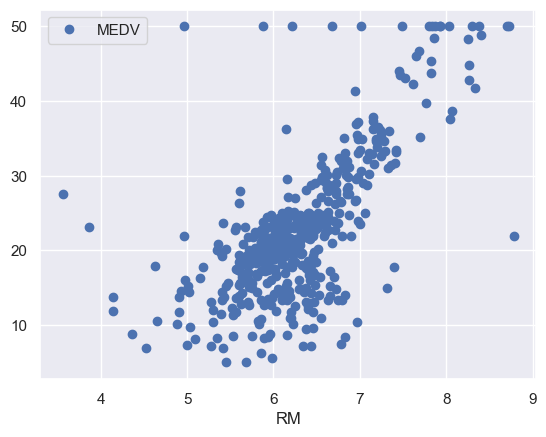

In [4]:
df.plot(x="RM",y="MEDV",style="o")

split the target variable and test variable

In [5]:
y = df["MEDV"]
x = df.drop("MEDV",axis=1)

In [6]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [7]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [8]:
n_samples, n_features = x.shape

In [9]:
print(f'#samples: {n_samples}, #features: {n_features}')

#samples: 506, #features: 13


## Standardize the variable

In [10]:
#from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()
sscaler.fit(x)
X_std = sscaler.transform(x)

## splitting the dataset

In [11]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=99)
X_train.shape

(354, 13)

## Define A Neural Network Model by PyTorch

In [12]:
class NN(nn.Module):
  def __init__(self):
    super(NN, self).__init__()
    self.layer1 = nn.Linear(X_train.shape[1],39)
    self.layer2 = nn.Linear(39,26)
    self.layer3 = nn.Linear(26,13)
    self.layer4 = nn.Linear(13,1)

  def forward(self,x):
    x = nn.functional.relu(self.layer1(x))
    x = nn.functional.relu(self.layer2(x))
    x = nn.functional.relu(self.layer3(x))
    x = self.layer4(x)
    return x

In [13]:
model = NN()

In [14]:
print(model)

NN(
  (layer1): Linear(in_features=13, out_features=39, bias=True)
  (layer2): Linear(in_features=39, out_features=26, bias=True)
  (layer3): Linear(in_features=26, out_features=13, bias=True)
  (layer4): Linear(in_features=13, out_features=1, bias=True)
)


In [16]:
for name, param in model.named_parameters():
    print(name, param.data)

layer1.weight tensor([[ 1.4167e-01,  1.4626e-01, -1.8639e-01, -1.5869e-01, -6.2620e-02,
          1.3238e-01,  1.6291e-02,  2.6829e-01,  1.0267e-01, -2.7525e-01,
          1.7850e-01, -1.7325e-02,  1.3607e-02],
        [ 2.0877e-01,  2.3204e-01, -1.3781e-01, -2.4901e-01, -8.8161e-02,
          5.8927e-02,  2.0866e-01, -5.4107e-02, -2.6452e-01,  2.4806e-01,
         -1.8696e-01, -9.3992e-02,  1.4386e-01],
        [-1.5840e-02,  1.2705e-01,  2.5578e-01,  1.9323e-01,  5.6821e-02,
         -2.3713e-02, -2.4064e-02, -2.2369e-01, -2.2859e-01,  2.6949e-01,
         -1.2506e-01,  1.5143e-02, -2.4887e-01],
        [-1.4134e-01, -5.1805e-02,  7.3764e-03, -3.4052e-02, -2.6032e-01,
         -1.6324e-01, -2.5944e-01,  2.4926e-03, -1.7489e-02, -7.6570e-02,
          9.5123e-02,  1.9017e-01, -7.7555e-02],
        [-1.2943e-01,  2.7443e-01, -2.2625e-01, -1.3635e-01,  1.6048e-01,
          8.1452e-02, -1.7196e-01,  1.4316e-01,  2.6576e-01, -2.2982e-01,
          1.8949e-01, -2.5928e-01,  1.8402e-01],
 

## Convert Data into Tensor

In [15]:
x = torch.tensor(np.array(X_train), dtype=torch.float32, requires_grad=True)
y = torch.tensor(np.array(y_train).reshape(-1,1), dtype=torch.float32)

In [16]:
x

tensor([[-0.3475, -0.4877, -0.4373,  ...,  1.1765,  0.4270, -0.5864],
        [ 0.8214, -0.4877,  1.0160,  ...,  0.8066, -3.4386,  1.5877],
        [ 0.5939, -0.4877,  1.0160,  ...,  0.8066,  0.3871,  0.6261],
        ...,
        [-0.4135, -0.4877, -1.2660,  ..., -0.3031,  0.3337,  0.0697],
        [-0.4130, -0.4877, -0.7553,  ...,  0.3442,  0.4411, -0.4167],
        [-0.3180, -0.4877,  1.5690,  ...,  1.2689,  0.4411,  0.7972]],
       requires_grad=True)

In [17]:
y

tensor([[19.9000],
        [11.8000],
        [13.1000],
        [20.0000],
        [ 7.2000],
        [23.3000],
        [22.7000],
        [19.0000],
        [20.4000],
        [17.2000],
        [21.7000],
        [27.9000],
        [24.8000],
        [14.9000],
        [22.9000],
        [24.4000],
        [23.2000],
        [16.1000],
        [14.6000],
        [15.6000],
        [19.4000],
        [24.1000],
        [12.0000],
        [23.1000],
        [10.4000],
        [17.1000],
        [45.4000],
        [11.9000],
        [21.7000],
        [13.4000],
        [20.3000],
        [13.6000],
        [23.1000],
        [18.2000],
        [36.1000],
        [18.5000],
        [31.0000],
        [36.2000],
        [13.8000],
        [27.1000],
        [11.8000],
        [18.9000],
        [50.0000],
        [42.3000],
        [26.7000],
        [24.1000],
        [13.1000],
        [28.2000],
        [19.5000],
        [ 5.0000],
        [10.2000],
        [15.6000],
        [24.

## Define Loss and Optimizer

In [18]:
learning_rate = 0.003

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Train the model
Finally,we can train the model!
At every epoch, we perform:

Initialize the gradient of the model parameter
Calculate the loss
calculate the gradient of the model parameter by backpropagation.
Update the model parameterter

In [19]:
epochs = 200
for i in range(epochs):
    #initialize the model parameter
    optimizer.zero_grad(set_to_none=True)
    
    #calculate the loss
    output_predicted = model(x)
    
    loss = loss_fn(output_predicted, y)
    
    #backpropagation
    loss.backward()
    
    #update the parameters
    optimizer.step()
    
    if(i%5 == 0):
        print(f"epochs: {i+1}, loss: {loss}")

epochs: 1, loss: 571.7166748046875
epochs: 6, loss: 532.43896484375
epochs: 11, loss: 448.2901611328125
epochs: 16, loss: 52.455116271972656
epochs: 21, loss: 41.11604309082031
epochs: 26, loss: 60.91594314575195
epochs: 31, loss: 33.64805221557617
epochs: 36, loss: 50.56849670410156
epochs: 41, loss: 28.833688735961914
epochs: 46, loss: 42.27499771118164
epochs: 51, loss: 25.483963012695312
epochs: 56, loss: 36.39479446411133
epochs: 61, loss: 23.0089168548584
epochs: 66, loss: 31.884668350219727
epochs: 71, loss: 21.072023391723633
epochs: 76, loss: 28.418981552124023
epochs: 81, loss: 19.460268020629883
epochs: 86, loss: 25.639896392822266
epochs: 91, loss: 18.175674438476562
epochs: 96, loss: 23.304731369018555
epochs: 101, loss: 17.07040023803711
epochs: 106, loss: 21.510665893554688
epochs: 111, loss: 16.09410858154297
epochs: 116, loss: 19.914073944091797
epochs: 121, loss: 15.256074905395508
epochs: 126, loss: 18.561481475830078
epochs: 131, loss: 14.538630485534668
epochs: 136

The loss would be gradually decreasing.It indicates that the training model is being well done.

In [22]:
predicted = model(x).detach().numpy()

In [23]:
y

tensor([[19.9000],
        [11.8000],
        [13.1000],
        [20.0000],
        [ 7.2000],
        [23.3000],
        [22.7000],
        [19.0000],
        [20.4000],
        [17.2000],
        [21.7000],
        [27.9000],
        [24.8000],
        [14.9000],
        [22.9000],
        [24.4000],
        [23.2000],
        [16.1000],
        [14.6000],
        [15.6000],
        [19.4000],
        [24.1000],
        [12.0000],
        [23.1000],
        [10.4000],
        [17.1000],
        [45.4000],
        [11.9000],
        [21.7000],
        [13.4000],
        [20.3000],
        [13.6000],
        [23.1000],
        [18.2000],
        [36.1000],
        [18.5000],
        [31.0000],
        [36.2000],
        [13.8000],
        [27.1000],
        [11.8000],
        [18.9000],
        [50.0000],
        [42.3000],
        [26.7000],
        [24.1000],
        [13.1000],
        [28.2000],
        [19.5000],
        [ 5.0000],
        [10.2000],
        [15.6000],
        [24.

In [24]:
predicted

array([[19.718494 ],
       [10.340645 ],
       [17.628124 ],
       [22.653889 ],
       [ 8.949842 ],
       [25.730095 ],
       [22.879406 ],
       [15.059073 ],
       [21.48656  ],
       [14.601262 ],
       [24.506866 ],
       [34.08926  ],
       [26.81298  ],
       [15.23006  ],
       [28.595531 ],
       [23.558739 ],
       [24.68613  ],
       [17.470722 ],
       [14.848557 ],
       [14.739183 ],
       [21.689205 ],
       [28.314438 ],
       [12.792739 ],
       [25.321156 ],
       [11.892067 ],
       [13.8286495],
       [47.27268  ],
       [21.621536 ],
       [21.204746 ],
       [ 9.69726  ],
       [21.184273 ],
       [16.233746 ],
       [24.05856  ],
       [21.12539  ],
       [36.962513 ],
       [18.455719 ],
       [37.990513 ],
       [32.96835  ],
       [13.469208 ],
       [29.023235 ],
       [14.840146 ],
       [18.686913 ],
       [50.746033 ],
       [46.47423  ],
       [32.612755 ],
       [25.707397 ],
       [ 9.588715 ],
       [33.61

## Validation

In [25]:
y_train_pred = model(torch.tensor(X_train, dtype=torch.float32, requires_grad=True))
y_test_pred = model(torch.tensor(X_test, dtype=torch.float32))

#convert to numpy array
y_train_pred = y_train_pred.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

## Accuracy: R^2

In [26]:
test_accuracy = r2_score(y_test, y_test_pred)
train_accuracy = r2_score(y_train, y_train_pred)
print(train_accuracy)
print(test_accuracy)

0.8661016968508046
0.7911556424141495


The score is good, can be improved using hyper-parameter tuning.

## Visualize the results
Finally, let's visualize the result by matplotlib.
The red and blue circles shows the results of training and validation data,respectively

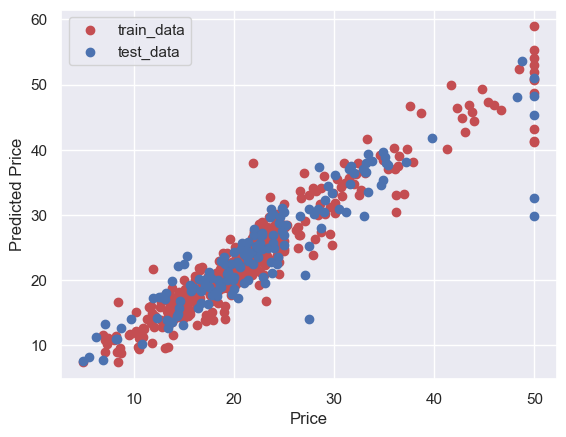

In [27]:
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.scatter(y_train, y_train_pred, color='r', label="train_data")
plt.scatter(y_test, y_test_pred, color='b', label="test_data")
plt.legend()
plt.show()

we have seen the Neural Network analysis constructed by PyTorch against the boston house prices dataset.Although we use a very simple network structure,the accuracy of the validation data is more than that of Linear Regression.